### We want to build a classifier that can predict profit by day, month, year

In [34]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
#  Import and read the file:
df = pd.read_csv("resources2/superstore_topcountries.csv", index_col=[0])
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,Category,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Days to Ship,Returned,Profit Margin Percentage,Returned $ Amount,Orders per Country
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,...,2,0.0,62.15,40.77,High,2,0.0,27.998018,0.0,9994
IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,...,9,0.1,-288.77,923.63,Critical,2,0.0,-7.784817,0.0,2837
IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,...,9,0.1,919.97,915.49,Medium,1,0.0,17.776614,0.0,2837
ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,...,5,0.1,-96.54,910.16,Medium,2,0.0,-3.337586,0.0,2063
IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,Corporate,Sydney,New South Wales,Australia,Oceania,Asia Pacific,Technology,...,5,0.1,763.28,897.35,Critical,3,0.0,26.663127,0.0,2837


In [19]:
# Keep only relevant columns for this analysis
df.drop(df.columns.difference(['Order Date', 'Sales']), 1, inplace=True)
df.head()

/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Order Date,Sales
Order ID,,
CA-2014-AB10015140-41954,2014-11-11,221.98
IN-2014-JR162107-41675,2014-02-05,3709.40
IN-2014-CR127307-41929,2014-10-17,5175.17
ES-2014-KM1637548-41667,2014-01-28,2892.51
IN-2014-JM156557-41818,2014-06-28,2862.68


In [20]:
# Check the number of unique values in each column
df.nunique()

Order Date     1412
Sales         17835
dtype: int64

In [11]:
df.dtypes

Order Date     object
Sales         float64
dtype: object

In [14]:
df['Order Date']= pd.to_datetime(df['Order Date'])

In [15]:
df.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [24]:
df.head()

,Sales
Order Date,
2014-11-11,221.98
2014-02-05,3709.40
2014-10-17,5175.17
2014-01-28,2892.51
2014-06-28,2862.68


In [25]:
# set order date as index
df.set_index('Order Date',inplace=True)

KeyError: "None of ['Order Date'] are in the columns"

In [35]:
df.head()

,Sales
Order Date,
2014-11-11,221.98
2014-02-05,3709.40
2014-10-17,5175.17
2014-01-28,2892.51
2014-06-28,2862.68


In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,38614.0,257.7769,513.955461,0.44,31.255,87.84,261.6075,22638.48


In [37]:
# Step 2 Visualization

<AxesSubplot:xlabel='Order Date'>

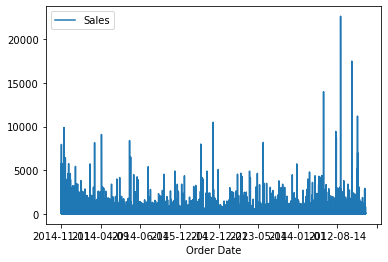

In [38]:
df.plot()

In [39]:
time_series = df['Sales']

In [40]:
type(time_series)

pandas.core.series.Series

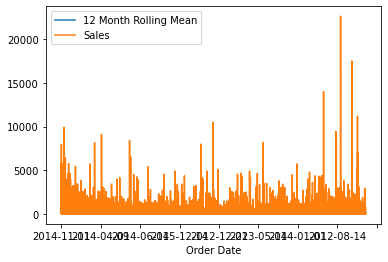

In [41]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.plot()
plt.legend()

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
decomp = seasonal_decompose(time_series)

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None